In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random

import pandas as pd
import numpy as np
import orchest

import matplotlib.pyplot as plt

In [3]:
from utils import random_dates

In [4]:
# Generate some dummy data

products = list(map(lambda x: "Product " + str(chr(65+x)), list(range(10))))

In [5]:
products

['Product A',
 'Product B',
 'Product C',
 'Product D',
 'Product E',
 'Product F',
 'Product G',
 'Product H',
 'Product I',
 'Product J']

In [6]:
# Product interactions
click_probability_distributions = np.array(list(map(lambda x: random.random(), range(len(products)))))
click_probability_distributions = click_probability_distributions / click_probability_distributions.sum()

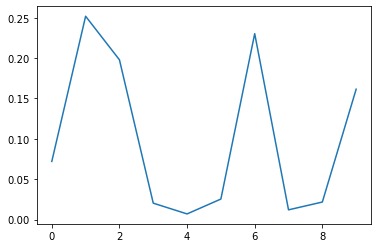

In [7]:
plt.plot(click_probability_distributions)

In [8]:
# Generate events
buy_count = 2000
view_count = 10000

In [9]:
start = pd.to_datetime('2020-1-01')
end = pd.to_datetime('2022-01-01')

In [10]:
def generate_events(event, start, end, count):
    product_choices = np.random.choice(products, count, p=click_probability_distributions)
    dates = random_dates(start, end, count)
    actions = [event] * count
    
    return product_choices, dates, actions

In [11]:
product_choices, dates, actions = generate_events("buy", start, end, buy_count)

In [12]:
df_buy = pd.DataFrame(zip(product_choices, dates, actions), columns=['product', 'date', 'action'])

In [13]:
product_choices, dates, actions = generate_events("view", start, end, view_count)

In [14]:
df_view = pd.DataFrame(zip(product_choices, dates, actions), columns=['product', 'date', 'action'])

In [15]:
df = pd.concat([df_buy, df_view]).reset_index(drop=True)

In [16]:
df

,product,date,action
0,Product C,2020-08-29 10:20:16,buy
1,Product G,2021-04-19 17:33:37,buy
2,Product G,2021-05-06 03:10:59,buy
3,Product B,2020-12-24 21:41:40,buy
4,Product C,2021-10-03 01:11:59,buy
...,...,...,...
11995,Product C,2020-04-03 21:16:10,view
11996,Product F,2021-02-04 09:18:42,view
11997,Product A,2021-03-03 08:05:58,view
11998,Product A,2020-10-18 00:27:51,view


In [17]:
orchest.output({"events": df, "products": products}, name="product_data")